In [2]:
from datasets import load_dataset

openwebdata = load_dataset("stas/openwebtext-10k",split='train')

openwebtext-10k.py:   0%|          | 0.00/3.08k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [3]:
openwebdata

Dataset({
    features: ['text'],
    num_rows: 10000
})

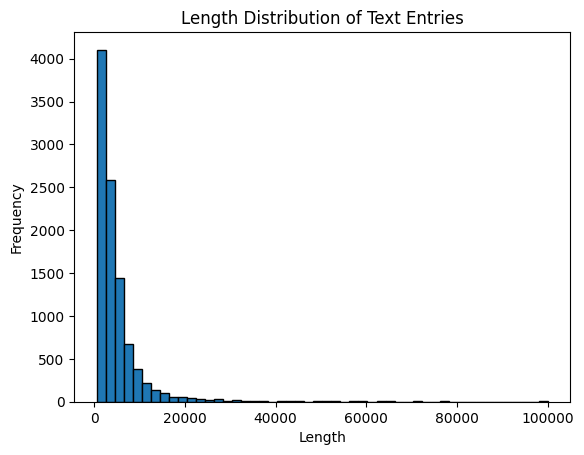

In [4]:
import matplotlib.pyplot as plt

# Calculate the length of each text entry
lengths = [len(text) for text in openwebdata['text']]

# Plot the histogram
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Text Entries')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [10]:
ranges = [(i, i + 100) for i in range(0, 3000, 100)]

In [12]:
import random
from tqdm import tqdm
# 设置每个区间抽取的样本数量
sample_size = 200

# 初始化一个空列表来存储样本
samples = []

# 遍历每个长度区间
for start, end in tqdm(ranges):
    # 找到在当前区间内的所有文本索引
    indices_in_range = [i for i, length in enumerate(lengths) if start <= length < end]
    
    # 如果当前区间内的文本数量少于样本数量，则使用所有文本
    if len(indices_in_range) < sample_size:
        samples.extend([openwebdata['text'][i] for i in indices_in_range])
    else:
        # 随机抽取样本
        sampled_indices = random.sample(indices_in_range, sample_size)
        samples.extend([openwebdata['text'][i] for i in sampled_indices])

# 打印样本数量
print(f"Total samples collected: {len(samples)}")

100%|██████████| 30/30 [02:24<00:00,  4.83s/it]

Total samples collected: 4266


In [16]:
# 先对 samples 列表按照长度进行排序
sorted_samples = sorted(samples, key=len)

# 保存排序后的 samples 列表到 JSON 文件中
import json
json.dump(sorted_samples, open('openwebtext_samples_lengthbalanced.json', 'w'), indent=2)

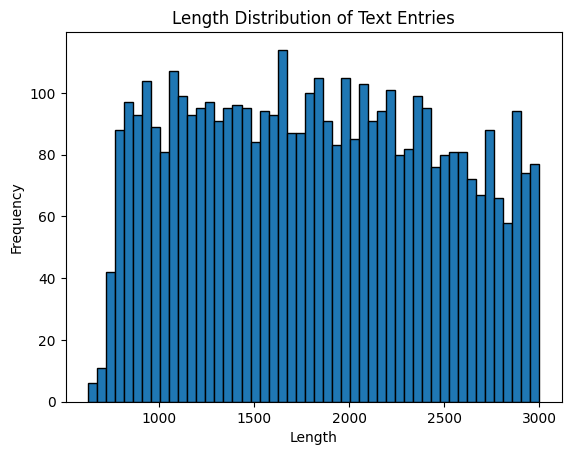

In [13]:
import matplotlib.pyplot as plt

# Calculate the length of each text entry
lengths = [len(text) for text in samples]

# Plot the histogram
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Length Distribution of Text Entries')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
